<hr style="border: double 5px;">

# 스타벅스 이디야 분석

<hr style="border: double 2px;">

## 시각화 기본

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import json

geo_path = './data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
import matplotlib.pyplot as plt

# 매직 커멘드 : 해당 파일에 그래프를 그려라 (inline)
%matplotlib inline 

# 마이너스 기호가 깨지는 현상 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 지원하게하기
f_path = "C:/Windows/Fonts/malgun.ttf" 
# f_path = "/Libary/Fonts/AppliGothic.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name() 
rc('font', family=font_name)

## 상가업소정보 2019년 6월

In [4]:
shop_df = pd.read_csv('./data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [5]:
shop_df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [6]:
view_columns =['상호명', '지점명', '상권업종대분류명',
               '상권업종중분류명', '상권업종소분류명','시도명',
               '시군구명',  '행정동명', '법정동명','지번주소',
               '경도', '위도']
shop_df[view_columns].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,127.047883,37.505675
1,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,126.899220,37.471711
2,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,128.980455,35.159774
3,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,127.061026,37.493922
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,127.104071,37.500249


In [7]:
shop_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565011,16284103,서동수타짬뽕,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,2641011000102180001013127,NaN,부산광역시 금정구 서동중심로 14,609831,46328.0,NaN,NaN,NaN,129.104354,35.210961
565012,16282701,주방,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,1144012300100570138013520,NaN,서울특별시 마포구 월드컵로19길 42,121820,4012.0,NaN,2,NaN,126.907641,37.555677
565013,16283091,원클래스독서실,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,...,2626010800112480004011513,월드메디컬타워,부산광역시 동래구 아시아드대로 239-1,607841,47851.0,NaN,2,202,129.067468,35.205469
565014,16287899,에스에스엠,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2638010300105220024033909,선경아트빌,부산광역시 사하구 낙동남로1367번길 16,604853,49314.0,NaN,NaN,101,128.961386,35.107213


In [8]:
shop_df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [9]:
shop_df['상권업종대분류명'].value_counts()

음식          183715
소매          177590
생활서비스        94104
학문/교육        42139
의료           25255
부동산          20460
관광/여가/오락     16283
숙박            5240
스포츠            230
Name: 상권업종대분류명, dtype: int64

In [10]:
df_seoul = shop_df.loc[shop_df['지번주소'].str.startswith('서울')]
df_seoul.shape

(401071, 39)

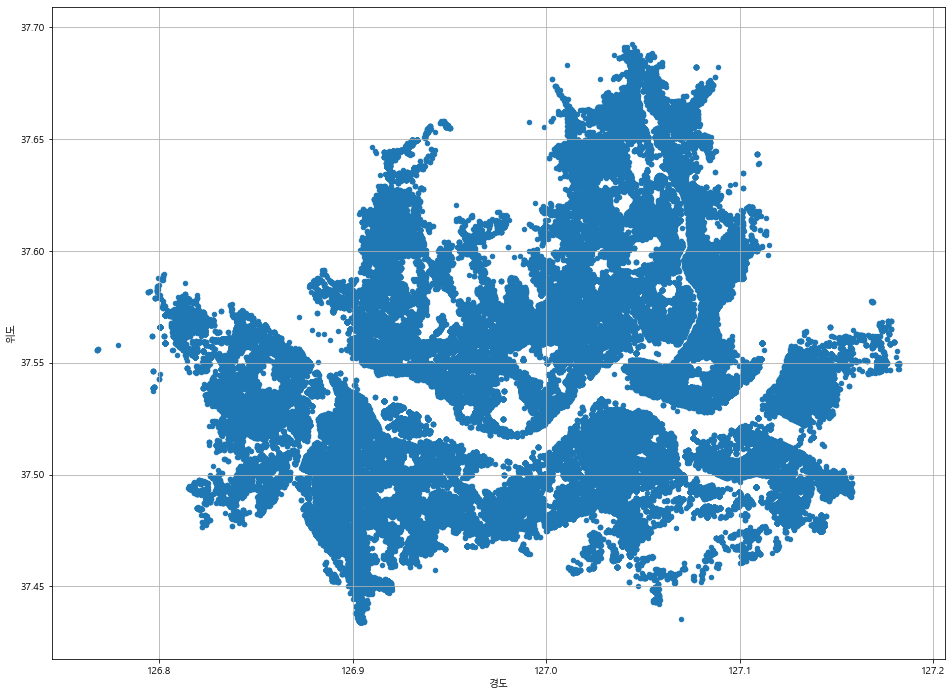

In [11]:
df_seoul.plot.scatter(x='경도', y='위도', figsize=(16,12), grid=True)

## seaborn scatter

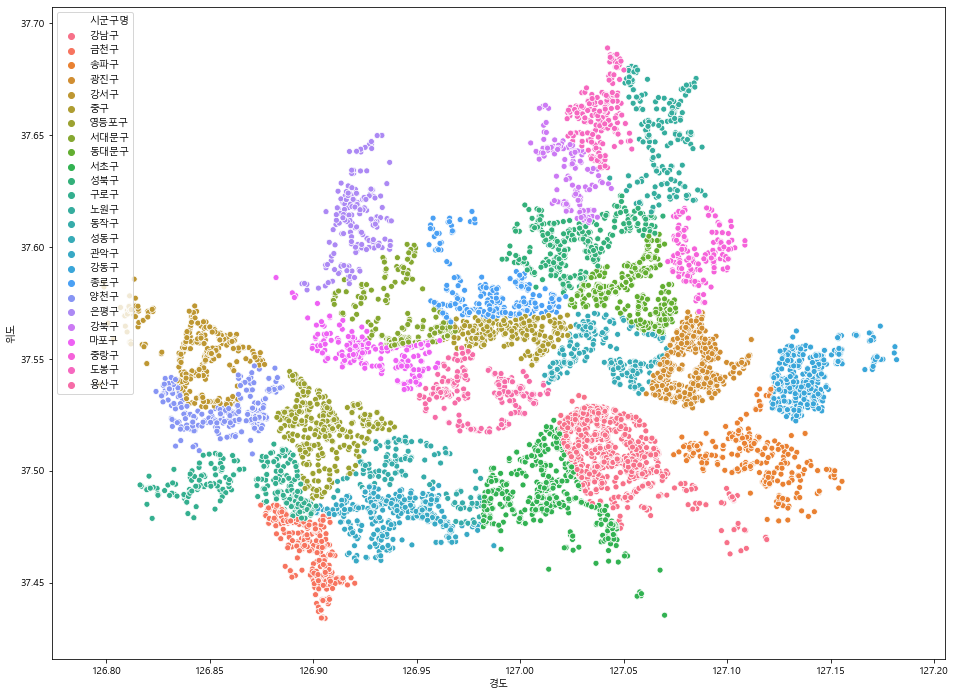

In [12]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_seoul[:10000],x='경도', y='위도', hue='시군구명')

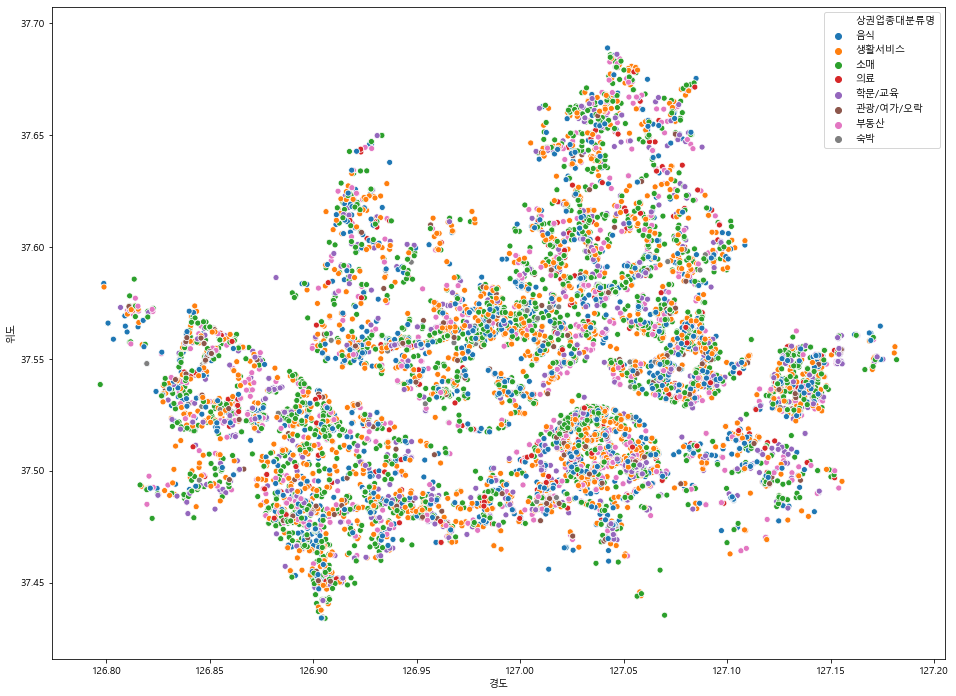

In [13]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_seoul[:10000],x='경도', y='위도', hue='상권업종대분류명')

### 골라서 보여주기

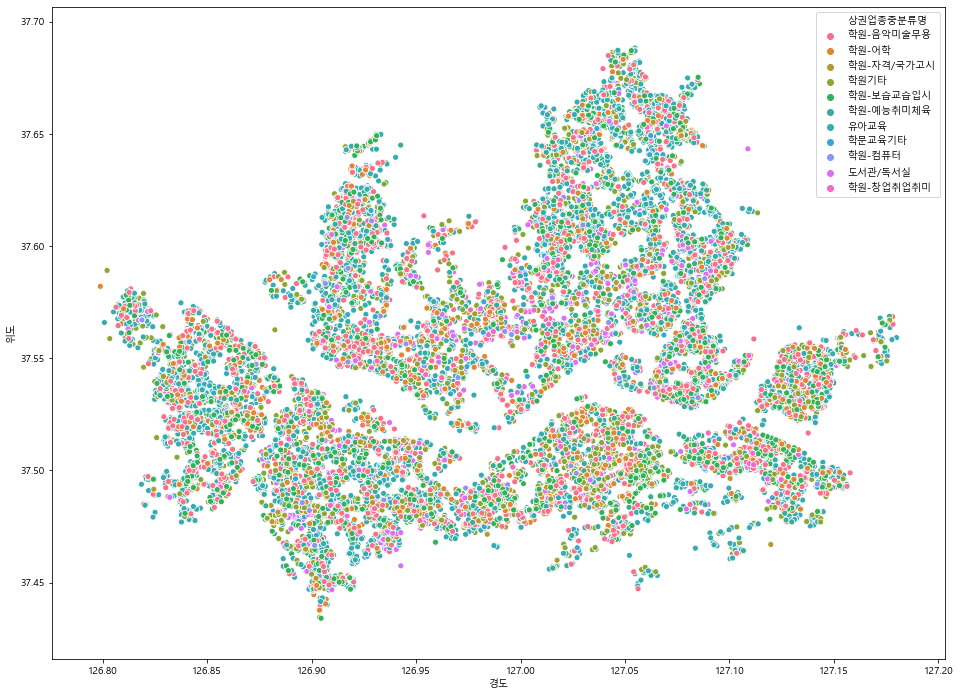

In [14]:
df_edu = df_seoul[df_seoul['상권업종대분류명']=='학문/교육']
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_edu,x='경도', y='위도', hue='상권업종중분류명')

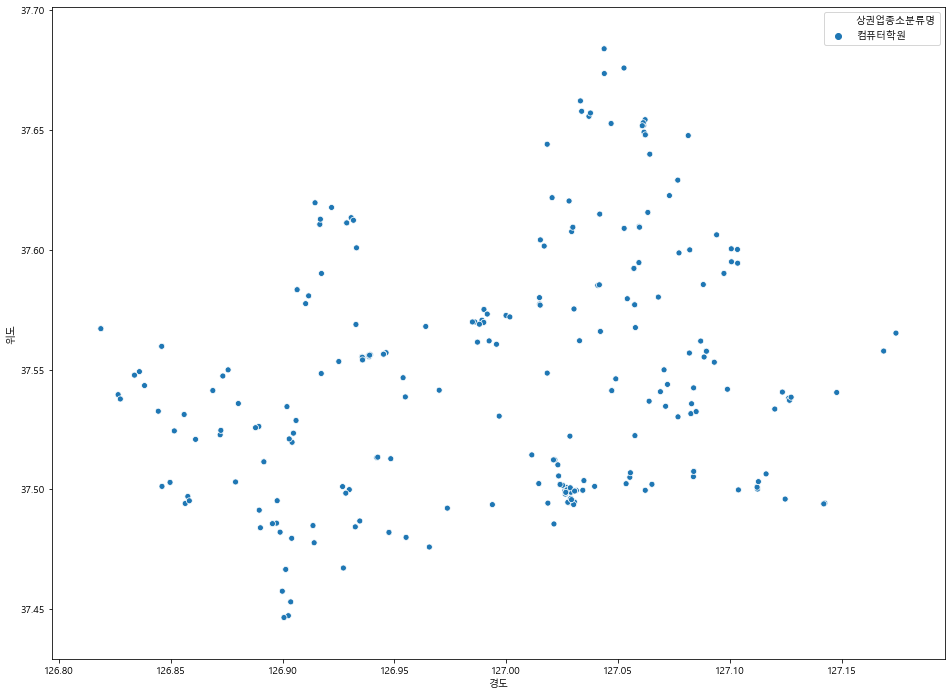

In [15]:
df_edu = df_seoul[(df_seoul['상권업종대분류명']=='학문/교육') & (df_seoul['상권업종중분류명']=='학원-컴퓨터')]
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_edu,x='경도', y='위도', hue='상권업종소분류명')

In [16]:
df_cafe = df_seoul[df_seoul['상권업종중분류명']=='커피점/카페']
df_cafe

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
10,20020124,스완카페트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013300106040056037792,NaN,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,NaN,2,NaN,126.897710,37.503693
16,19973708,왕실,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114012700101050000019781,NaN,서울특별시 중구 남대문로 52-13,100810,4535.0,NaN,1,NaN,126.982419,37.562274
20,20004707,커피빈,코리아교대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010800116570005024412,카이스시스템빌딩,서울특별시 서초구 서초중앙로 118,137070,6634.0,NaN,1,NaN,127.014217,37.492388
22,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564806,16308565,투썸플레이스,문정역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171010800102210000000001,엠스테이트,서울특별시 송파구 법원로 114,138888,5854.0,NaN,NaN,NaN,127.120998,37.486049
564862,16287056,탐앤탐스,굿모닝시티점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114014800100180220000001,굿모닝시티쇼핑몰,서울특별시 중구 장충단로 247,100729,4564.0,NaN,4,12,127.007340,37.566793
564863,16286891,엔존,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117013100107290034004939,NaN,서울특별시 용산구 이태원로54길 16-9,140892,4400.0,NaN,1,NaN,127.002605,37.537271
564935,16294059,커핀그루나루,올림픽공원역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171011100100880000015430,올림픽공원,서울특별시 송파구 올림픽로 424,138749,5540.0,NaN,NaN,NaN,127.115777,37.520349


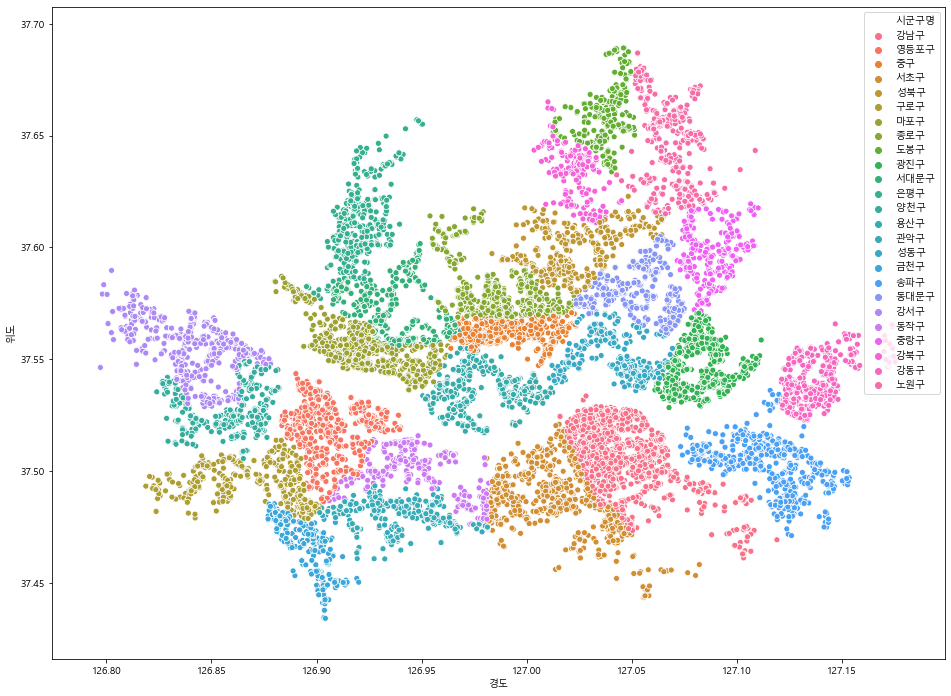

In [17]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_cafe,x='경도', y='위도', hue='시군구명')

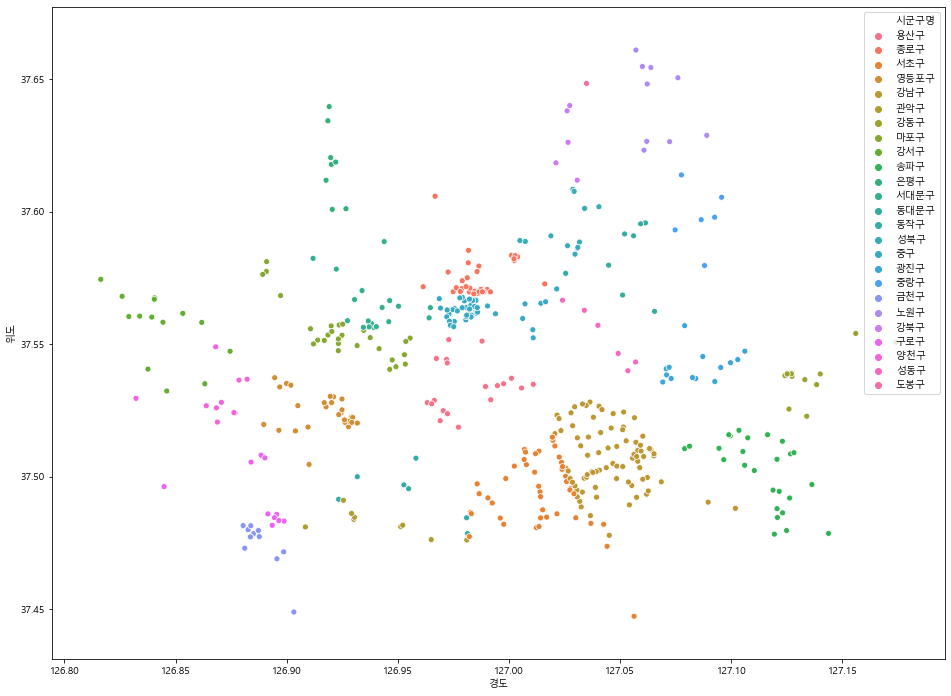

In [18]:
df_starbucks = df_cafe[df_cafe['상호명'].str.contains('스타벅스')]
df_starbucks_eng = df_cafe[df_cafe['상호명'].str.contains('starbucks')]
df_starbucks_eng_up = df_cafe[df_cafe['상호명'].str.contains('STARBUCKS')]

df_starbucks = df_cafe[df_cafe['상호명'].str.contains('스타벅스|STARBUCKS')]

plt.figure(figsize=(16,12))
sns.scatterplot(data=df_starbucks,x='경도', y='위도', hue='시군구명')

In [19]:

df_starbucks['상호명'].unique()

array(['스타벅스', '스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스신림점', '스타벅스서울대입구역점',
       '스타벅스광장점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스종각점', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워',
       '스타벅스방배카페입구', '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스종로관수점', '스타벅스논현힐탑',
       '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스선릉로점', '스타벅스명동역',
       '스타벅스미아역점', '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점',
       '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점',
       '스타벅스구로하이엔드점', '스타벅스남산스테이트', '스타벅스목동점', '스타벅스삼성교점', '스타벅스조선호텔후문',
       '스타벅스명일이마트점', '스타벅스커리학동사거리점', '스타벅스서울교대점', '스타벅스강북구청사거리점',
       '스타벅스청담사거리점', '스타벅

In [20]:
df_starbucks['상호명'].unique

<bound method Series.unique of 1219                스타벅스
1946           스타벅스종로3가점
2840                스타벅스
14939     스타벅스커피여의도IFC1F
14951               스타벅스
               ...      
562067              스타벅스
562068              스타벅스
562381              스타벅스
563162              스타벅스
564740              스타벅스
Name: 상호명, Length: 500, dtype: object>

In [21]:
df_starbucks_eng['상호명'].unique

<bound method Series.unique of Series([], Name: 상호명, dtype: object)>

In [22]:
df_starbucks_eng_up['상호명'].unique

<bound method Series.unique of 227622    STARBUCKSCOFFEE
Name: 상호명, dtype: object>

In [23]:
df_cafe =df_cafe[df_cafe['상호명'].str.contains('ediya|이디아|이디야|EDIYA|스타벅스|STARBUCKS')]

In [24]:
df_cafe['상호명'].value_counts

<bound method IndexOpsMixin.value_counts of 1219           스타벅스
1676          이디야커피
1946      스타벅스종로3가점
2840           스타벅스
2886          이디야커피
            ...    
562067         스타벅스
562068         스타벅스
562381         스타벅스
563162         스타벅스
564740         스타벅스
Name: 상호명, Length: 1029, dtype: object>

In [25]:
df_cafe.loc[df_cafe['상호명'].str.contains('star|스타|STAR'), '상호명'].value_counts().sum()

501

In [26]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타'), '브랜드명'] = '스타벅스'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
# df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [28]:
df_cafe.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
1219,19976038,스타벅스,이태원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 용산구 이태원로 188,140200,4406.0,NaN,NaN,29,126.994781,37.534303,스타벅스
1676,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118,NaN
1946,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 종로구 종로 113-1,110123,3139.0,NaN,1,NaN,126.990207,37.570585,스타벅스
2840,20680373,스타벅스,신사2점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,푸른빌딩,서울특별시 서초구 강남대로 581,137904,6530.0,NaN,2,NaN,127.019763,37.513663,스타벅스
2886,20592419,이디야커피,이마트구로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,이마트구로점,서울특별시 구로구 디지털로32길 43,152050,8379.0,NaN,3,NaN,126.897870,37.484385,NaN


In [29]:
df_cafe['브랜드명'].value_counts()

스타벅스    500
Name: 브랜드명, dtype: int64

In [30]:
mym = folium.Map(location=[df_cafe['위도'].mean(), df_cafe['경도'].mean()], zoom_start=12, tiles='Stamen Toner')
mym

In [31]:
mym = folium.Map(location=[df_cafe['위도'].mean(), df_cafe['경도'].mean()], zoom_start=12, tiles='Stamen Toner')
for n in df_cafe.index:
    if df_cafe.loc[n, '브랜드명']=='스타벅스' :
        icon_color='green'
    else:
        icon_color='blue'
    folium.CircleMarker(
        location=[df_cafe.loc[n, '위도']
        , df_cafe.loc[n, '경도']]
        , radius=3
        , popup=df_cafe.loc[n, '상호명']
        , color=icon_color
        , fill=True
        , fill_color=icon_color
    ).add_to(mym)
    
mym

In [32]:
df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()

시군구명  브랜드명
강남구   스타벅스    84
강동구   스타벅스    13
강북구   스타벅스     5
강서구   스타벅스    17
관악구   스타벅스     9
광진구   스타벅스    15
구로구   스타벅스    11
금천구   스타벅스    13
노원구   스타벅스     9
도봉구   스타벅스     1
동대문구  스타벅스     8
동작구   스타벅스     8
마포구   스타벅스    30
서대문구  스타벅스    19
서초구   스타벅스    47
성동구   스타벅스     6
성북구   스타벅스    13
송파구   스타벅스    28
양천구   스타벅스    10
영등포구  스타벅스    30
용산구   스타벅스    20
은평구   스타벅스    10
종로구   스타벅스    33
중구    스타벅스    55
중랑구   스타벅스     6
Name: 상호명, dtype: int64

In [33]:
df_cafe_brand=pd.DataFrame(df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()
df_cafe_brand.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강동구,스타벅스,13
2,강북구,스타벅스,5
3,강서구,스타벅스,17
4,관악구,스타벅스,9


In [34]:
df_cafe_brand.columns = ['구','브랜드명','매장수']
df_cafe_brand

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강동구,스타벅스,13
2,강북구,스타벅스,5
3,강서구,스타벅스,17
4,관악구,스타벅스,9
5,광진구,스타벅스,15
6,구로구,스타벅스,11
7,금천구,스타벅스,13
8,노원구,스타벅스,9
9,도봉구,스타벅스,1


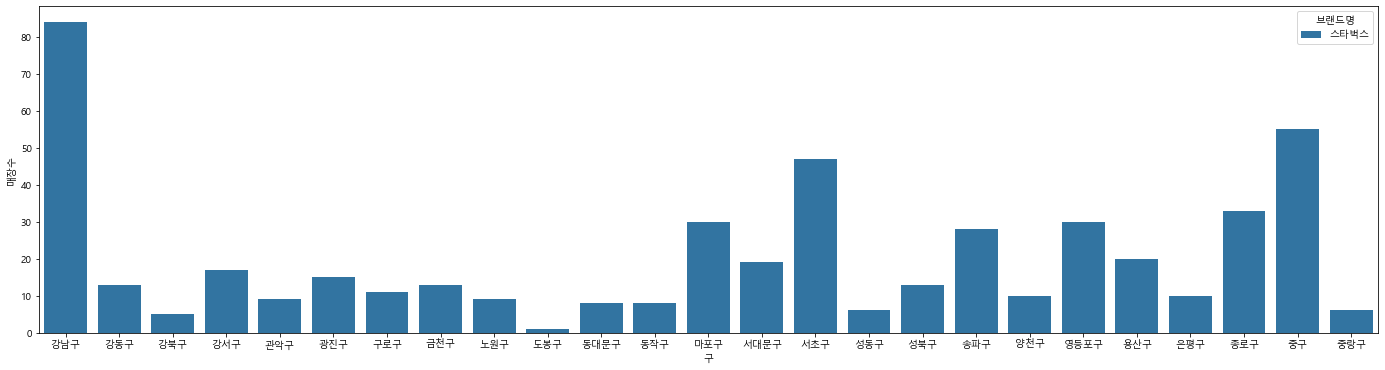

In [35]:
plt.figure(figsize=(24,6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')